In [1]:
#This midterm will be a little different.  The zip file includes 30-35 different stock tickers as well as two aggregate csv files with all stocks.  Your ask is as follows:

#Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 
#Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.
#You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.
#Take five stocks of your choice and create the same type of report stated in question 2.

#Notes:

#You need to write a report for every question in a cell before solving the question. In this report, you need to write what approach you are considering to solve each question. You can include visualization, code or anything whatever you think best describe your approach. (25%)
#Midterm contains three questions. For every question weighttag of marks is 25%. 

In [2]:
#Read in all stock tickers as variables. 

In [323]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from matplotlib.patches import PathPatch
%matplotlib inline

In [251]:
#Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

#Steps to accomplish this
#1. read all files in from the stock-time-series-20050101-to-20171231 subfolder containing CSV 
#2. create dictionary for ease of use storing dataframes
#3. Loop through files. read each file into a dataframe and save using string parsing on the title
#   String parsing os agnostic :)
#4. Read in all stock csvs into their own variables 

In [252]:
files = glob.glob('stock-time-series-20050101-to-20171231/*.csv')

In [253]:
#intialize empty dictionary that we will append dataframes to
stocks = {}

In [254]:
for file in files:
    stock = pd.read_csv(file) 
    if os.name == 'nt':
        x = file.split("\\")
    else:
        x = file.split("/")
    y = x[1].split("_")
    #intialize empty list that we will append dataframes to
    stocks[y[0]] = stock

In [255]:
#Monthly stock prices for 2018
all_stocks_2006 = pd.read_csv('stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv')

In [256]:
#Daily stock price for 2018
all_stocks_2018 = pd.read_csv('stock-time-series-20050101-to-20171231/all_stocks_2017-01-01_to_2018-01-01.csv')

In [257]:
#Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

In [258]:
#Set start_date and end_date to variables so they can be adjusted

In [259]:
start_date = "2006-02-06"
end_date = "2007-02-15"

In [260]:
#Create variable for stock from Dictionary

In [261]:
ABBA = stocks['AABA']

In [262]:
ABBA.info

<bound method DataFrame.info of             Date   Open   High    Low  Close     Volume  Name
0     2006-01-03  39.69  41.22  38.79  40.91   24232729  AABA
1     2006-01-04  41.22  41.90  40.77  40.97   20553479  AABA
2     2006-01-05  40.93  41.73  40.85  41.53   12829610  AABA
3     2006-01-06  42.88  43.57  42.80  43.21   29422828  AABA
4     2006-01-09  43.10  43.66  42.82  43.42   16268338  AABA
5     2006-01-10  42.96  43.34  42.34  42.98   16288580  AABA
6     2006-01-11  42.19  42.31  41.72  41.87   26192772  AABA
7     2006-01-12  41.92  41.99  40.76  40.89   18921686  AABA
8     2006-01-13  41.00  41.08  39.62  39.90   30966185  AABA
9     2006-01-17  39.09  40.39  38.96  40.11   42429911  AABA
10    2006-01-18  35.01  36.16  34.74  35.18  118670393  AABA
11    2006-01-19  35.82  35.84  34.24  34.33   60918436  AABA
12    2006-01-20  34.44  34.66  33.21  33.74   57681688  AABA
13    2006-01-23  34.22  34.40  33.98  34.17   30894265  AABA
14    2006-01-24  34.55  35.20  34.51 

In [263]:
ABBA.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [282]:
plt.style.use('fivethirtyeight')

In [265]:
#Find the all time high price
#Find the all time low price
#Find the highest volume day

In [266]:
print("All time highest price")
print(ABBA.loc[ABBA["Close"].idxmax()])
print("\nAll time lowest price")
print(ABBA.loc[ABBA["Close"].idxmin()])
print("\nHighest volume day")
print(ABBA.loc[ABBA["Volume"].idxmax()])

All time highest price
Date      2017-11-24
Open           72.47
High           73.18
Low            72.31
Close          72.93
Volume       3356343
Name            AABA
Name: 2994, dtype: object

All time lowest price
Date      2008-11-20
Open             9.1
High           10.01
Low             8.94
Close           8.95
Volume      37316961
Name            AABA
Name: 727, dtype: object

Highest volume day
Date      2008-02-01
Open           28.68
High           29.83
Low            27.34
Close          28.38
Volume     438231658
Name            AABA
Name: 523, dtype: object


In [267]:
#Add the rolling mean to the stock
#Stock data is time series data
#Moving average analyzes a stocks performance from a long term perspective

In [268]:
ABBA

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
5,2006-01-10,42.96,43.34,42.34,42.98,16288580,AABA
6,2006-01-11,42.19,42.31,41.72,41.87,26192772,AABA
7,2006-01-12,41.92,41.99,40.76,40.89,18921686,AABA
8,2006-01-13,41.00,41.08,39.62,39.90,30966185,AABA
9,2006-01-17,39.09,40.39,38.96,40.11,42429911,AABA


In [283]:
#Calculate the two week moving average. 10 Business Days

In [310]:
ABBA['Rolling Mean'] = ABBA.Close.rolling(10).mean()

In [392]:
start_date = "2006-02-06"
end_date = "2006-02-30"

In [393]:
mask = (ABBA["Date"] >= start_date) & (ABBA["Date"] <= end_date)

In [394]:
#Filter Dataframe down by dates

In [415]:
ABBA_RANGE = ABBA.loc[mask]

Text(0,0.5,'Price')

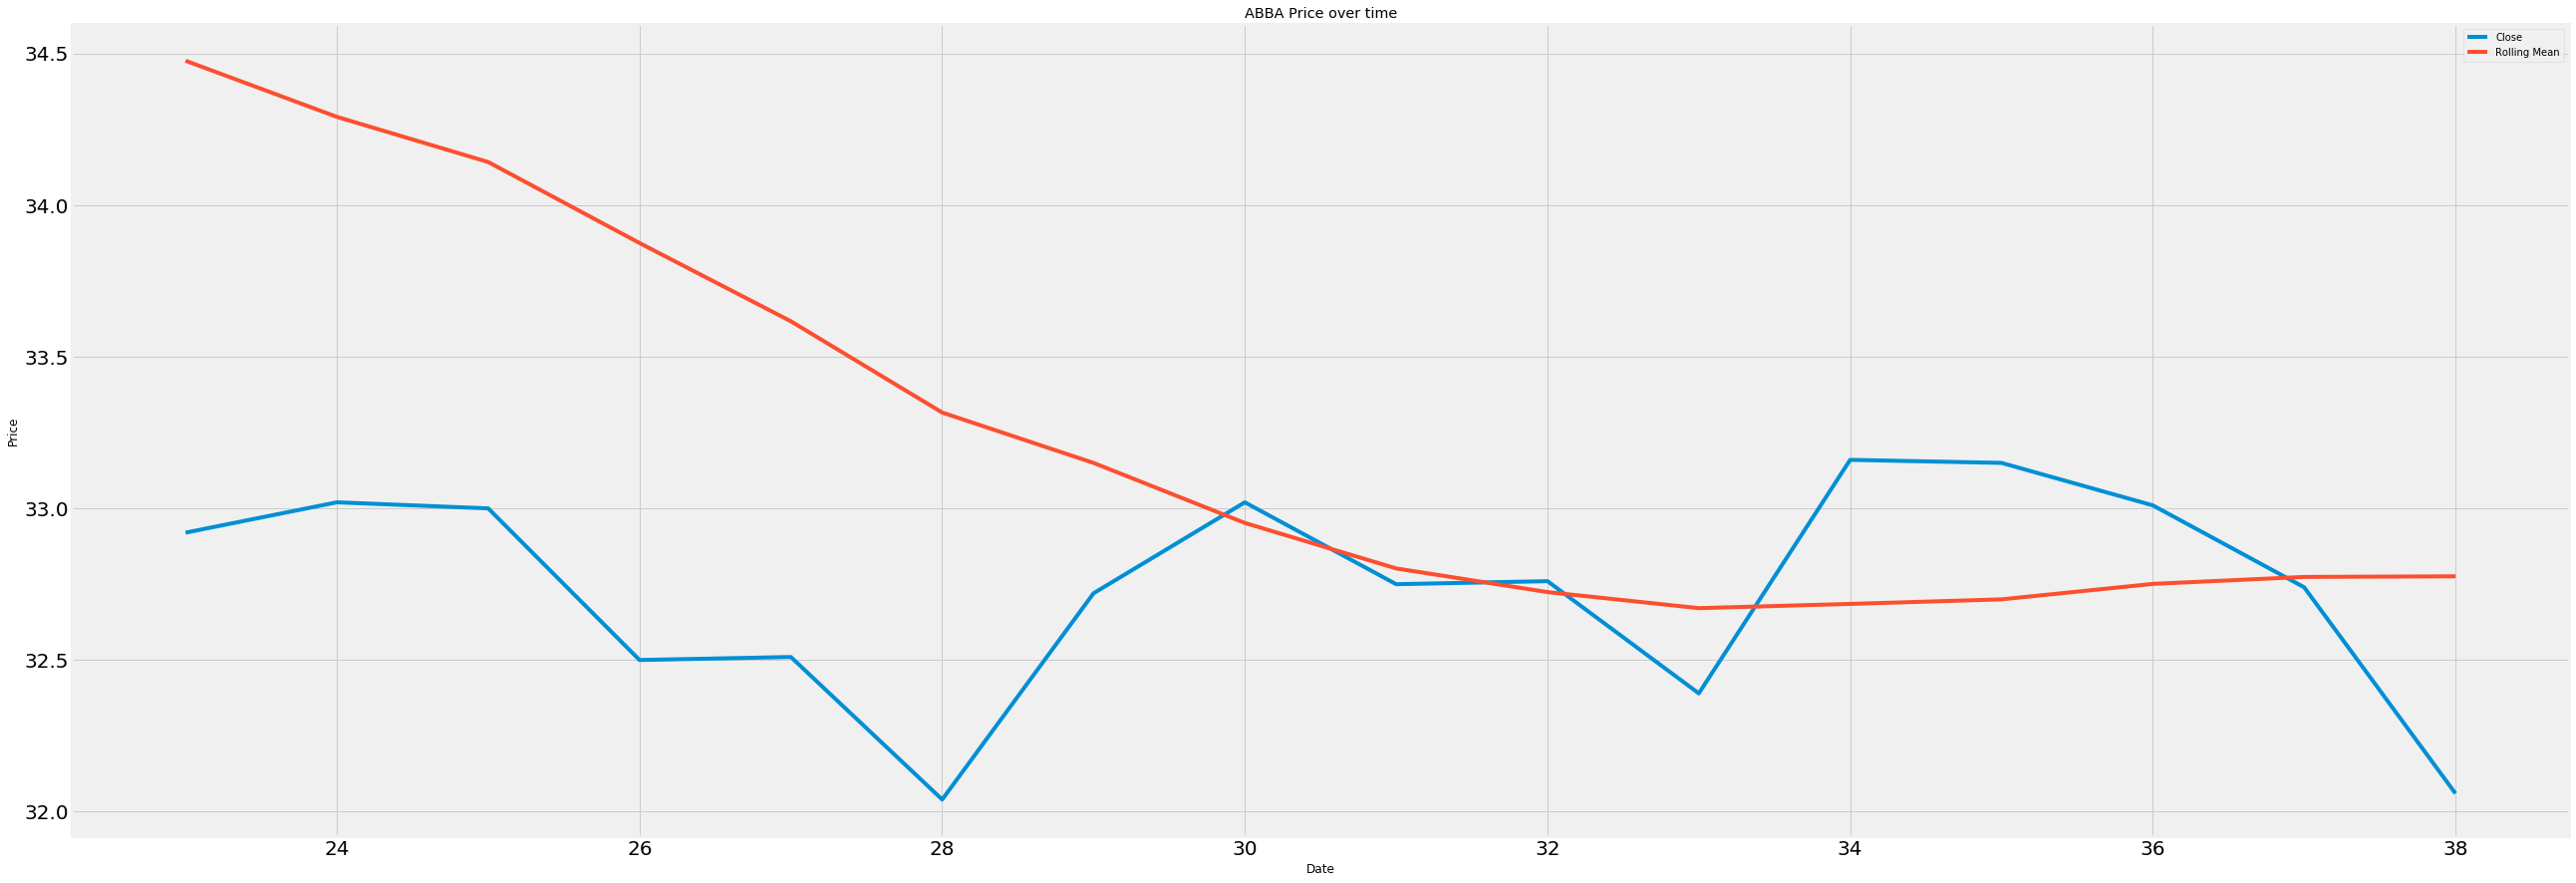

In [416]:
ax = ABBA_RANGE.plot.line(y=["Close","Rolling Mean"], use_index=True, title="ABBA Price over time", fontsize=20, figsize=(40,15))
ax.set_xlabel("Date")
ax.set_ylabel("Price")

In [397]:
#Create Candle Stick Chart.
#1. Add the median daily stock price
#2. Set the Date to the index
#3. Drop the Volume, Name and Rolling Mean columns
#4. Plot the Box. Since we have 5 values High and Low will be the wiskers and Open and Close will form the Box. Median will be the median.

In [398]:
ABBA_RANGE['Median'] = (ABBA_RANGE["Open"] + ABBA_RANGE["Close"]) /2
ABBA_RANGE.set_index("Date", inplace=True)
ABBA_RANGE = ABBA_RANGE.drop(columns=['Volume','Name',"Rolling Mean"]).T
ABBA_RANGE

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date,2006-02-06,2006-02-07,2006-02-08,2006-02-09,2006-02-10,2006-02-13,2006-02-14,2006-02-15,2006-02-16,2006-02-17,2006-02-21,2006-02-22,2006-02-23,2006-02-24,2006-02-27,2006-02-28
Open,33.90,33.010,33.24,33.010,32.580,32.210,32.14,32.62,33.300,32.88,32.900,32.490,33.01,33.200,33.110,32.630
High,33.95,33.100,33.40,33.360,32.600,32.440,32.83,33.33,33.400,33.14,33.070,33.340,33.66,33.340,33.210,32.980
Low,32.78,32.320,32.51,32.400,32.100,31.700,32.05,32.55,32.600,32.71,32.380,32.400,32.88,32.920,32.570,31.340
Close,32.92,33.020,33.00,32.500,32.510,32.040,32.72,33.02,32.750,32.76,32.390,33.160,33.15,33.010,32.740,32.060
Median,33.41,33.015,33.12,32.755,32.545,32.125,32.43,32.82,33.025,32.82,32.645,32.825,33.08,33.105,32.925,32.345


In [399]:
#Plot the Candle Stick Chart
# Return a dictionary
# When the Stock closing price is higer than the open price color the box green
# When the Stock closing price is lower than the open price color the box red

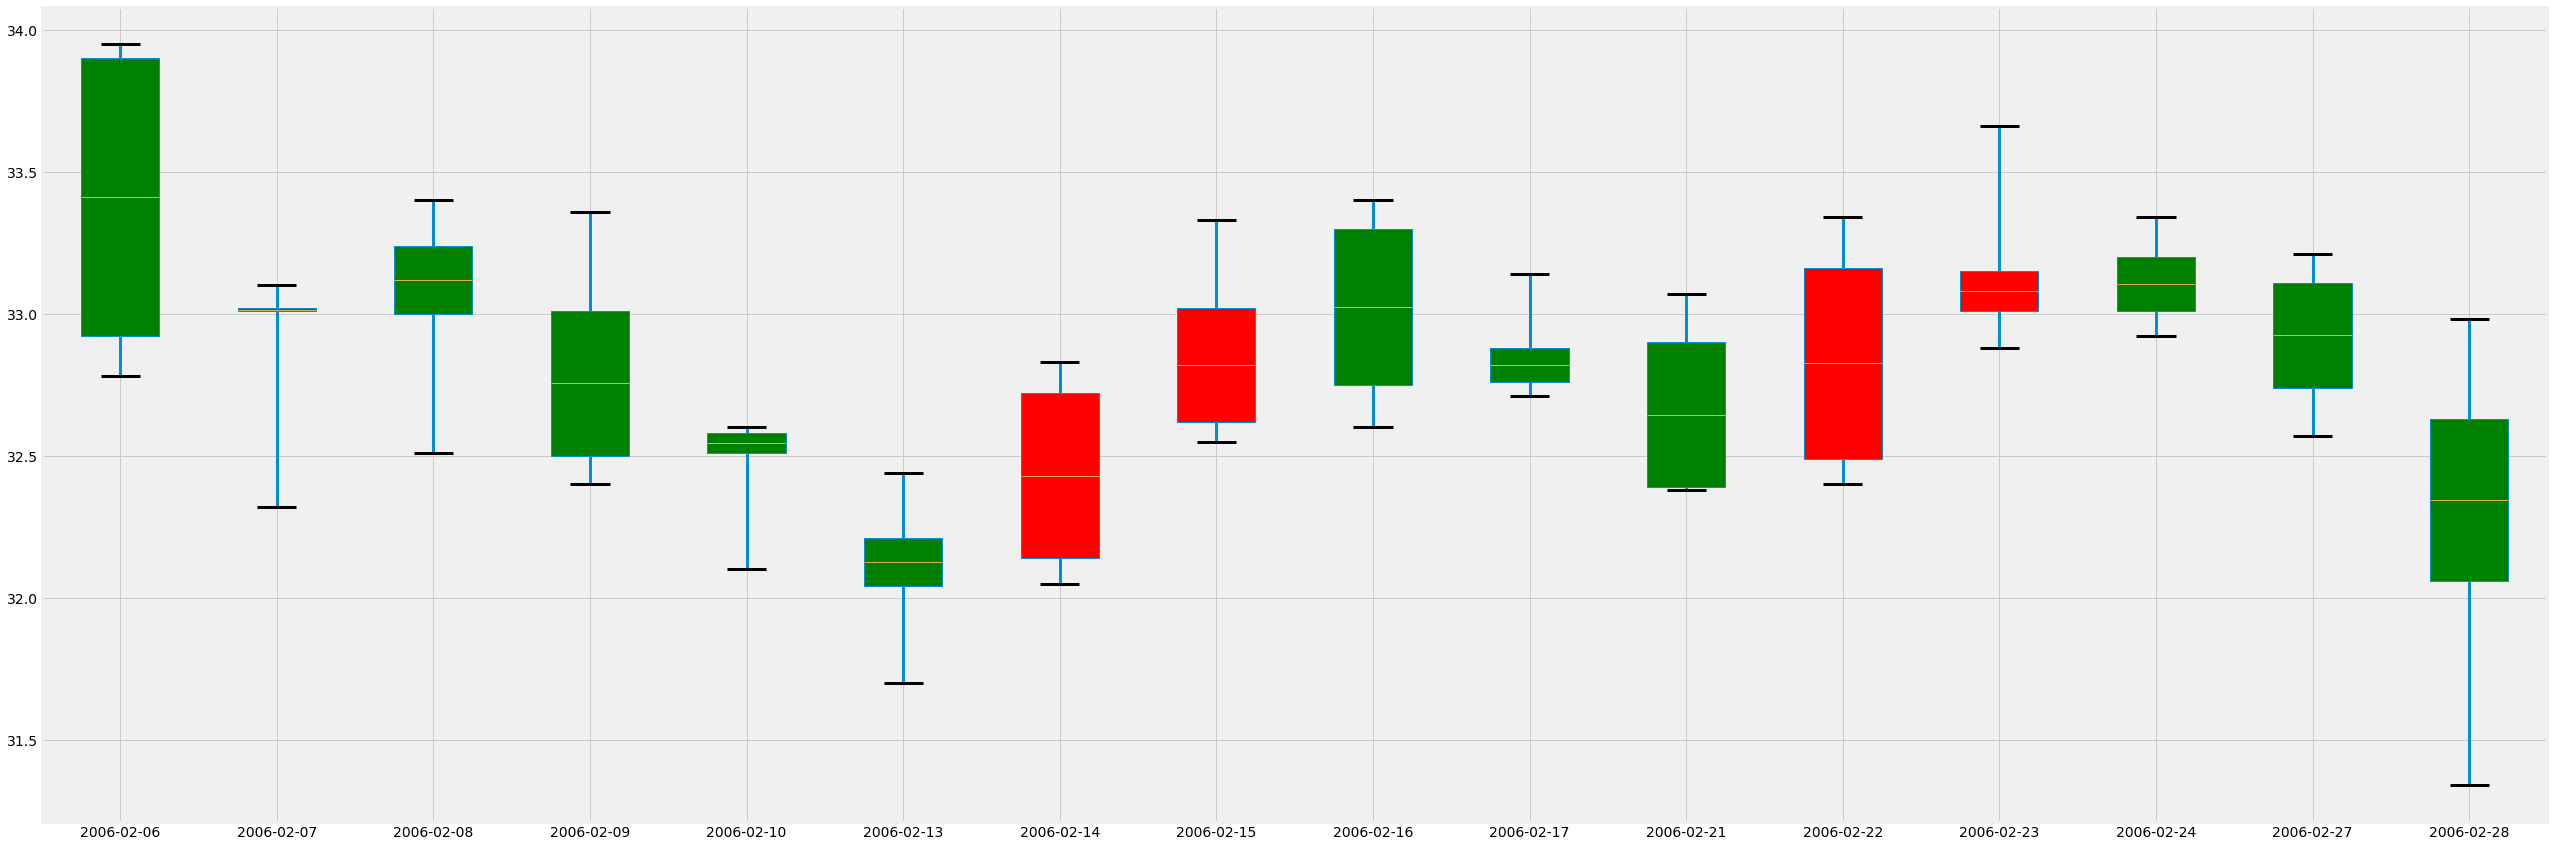

In [412]:
bp_dict = ABBA_RANGE.boxplot(whis=99, autorange=False, fontsize=14, figsize=(40, 15), return_type='dict', whiskerprops=dict(color="black", linewidth=3), capprops=dict(color="black", linewidth=3), flierprops=dict(color="black", linewidth=3), patch_artist=True)

x = 0
for column in ABBA_RANGE:
    if ABBA_RANGE[column].iloc[0] - ABBA_RANGE[column].iloc[3] >= 0:
        bp_dict['boxes'][x].set_facecolor('green')
    else:
        bp_dict['boxes'][x].set_facecolor('red')
    x = x+1
            